### 🎧 Spotify Global Listening Trends Analysis

## 📌 Project Objective:
This project aims to explore and analyze listening behavior across different countries using a global Spotify dataset. We will perform exploratory data analysis (EDA), identify top artists/tracks, examine country-level trends, and attempt basic modeling to understand song popularity patterns.

**Dataset Source**: [Kaggle - Top Spotify Songs in Countries](https://www.kaggle.com/datasets/anandshaw2001/top-spotify-songs-in-countries)


### imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### load dataset from GitHub

In [ ]:
url = 'https://raw.githubusercontent.com/Sujoy-004/spotify-global-analysis/main/spotify_history.csv'
df = pd.read_csv(url)

#preview
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


### 🧾 Dataset Overview

This dataset contains streaming history from Spotify across multiple countries. Below is a quick summary of the main columns:

- **trackName**: Name of the track
- **artistName**: Name of the artist
- **genre**: Genre category of the song
- **popularity**: Popularity score (0 to 100)
- **duration_ms**: Duration of the track in milliseconds
- **country**: Country of the listener
- **timestamp (was 'ts')**: When the track was played


### basic info and shape

In [ ]:
# rows and columns
print("Shape of dataset :", df.shape)

# Check basic structure
df.info()

# Basic statistics for numerical columns
df.describe()

Shape of dataset : (149860, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


### check for missing values

In [ ]:
df.isnull().sum()

,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,143
reason_end,117
shuffle,0


### Duplicate check

In [ ]:
print("Total duplicates:", df.duplicated().sum())

Total duplicates: 1185


### drop duplicates if found

In [ ]:
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates : ", df.shape)

Shape after removing duplicates :  (148675, 11)


In [ ]:
# Recheck nulls post-cleaning
df.isnull().sum()

,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,143
reason_end,117
shuffle,0


### Basic row and column insights

In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].unique()} unique values")

spotify_track_uri: ['2J3n32GeLmMjwuAzyhcSNe' '1oHxIPqJyvAYHy0PVrDU98'
 '487OPlneJNni3NWC8SYqhW' ... '0mWXrr6HQZUhCQG4JMkT2e'
 '2dhwJNH50XJWS3tCKVWKtD' '0mD2pnYVF8DB3oqtY5KM8h'] unique values
ts: ['2013-07-08 02:44:34' '2013-07-08 02:45:37' '2013-07-08 02:50:24' ...
 '2024-12-15 23:06:22' '2024-12-15 23:06:23' '2024-12-15 23:06:25'] unique values
platform: ['web player' 'windows' 'android' 'iOS' 'cast to device' 'mac'] unique values
ms_played: [  3185  61865 285386 ... 105659  24162  10672] unique values
track_name: ['Say It, Just Say It' 'Drinking from the Bottle (feat. Tinie Tempah)'
 'Born To Die' ... 'Oo-De-Lally - From "Robin Hood"' 'King Of The Road'
 'Chug-A-Lug'] unique values
artist_name: ["The Mowgli's" 'Calvin Harris' 'Lana Del Rey' ... 'Rudy Snow'
 'Ultra Band' 'Jesse Welles'] unique values
album_name: ['Waiting For The Dawn' '18 Months' 'Born To Die - The Paradise Edition'
 ... 'Patchwork' 'Oo-De-Lally' 'King Of The Road'] unique values
reason_start: ['autoplay' 'clickrow' 

In [ ]:
df.columns.tolist()

['spotify_track_uri',
 'ts',
 'platform',
 'ms_played',
 'track_name',
 'artist_name',
 'album_name',
 'reason_start',
 'reason_end',
 'shuffle',
 'skipped']

In [ ]:
df.rename(columns={'ts':'timestamp'}, inplace= True)

# confirm changes
df.columns

Index(['spotify_track_uri', 'timestamp', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

### Engineered Features: Play Count and Average Listening Time

In [ ]:
# Calculate play count for each track
play_count = df['spotify_track_uri'].value_counts().reset_index()
play_count.columns = ['spotify_track_uri', 'play_count']

# Calculate average listening time for each track
average_ms_played = df.groupby('spotify_track_uri')['ms_played'].mean().reset_index()
average_ms_played.columns = ['spotify_track_uri', 'average_ms_played']

# Merge the new features back into the original DataFrame
df = pd.merge(df, play_count, on='spotify_track_uri', how='left')
df = pd.merge(df, average_ms_played, on='spotify_track_uri', how='left')

# Display the first few rows with the new features
display(df.head())

,spotify_track_uri,timestamp,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,play_count,average_ms_played
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,1,3185.0
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2,151096.0
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,5,144144.2
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,1,134022.0
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,1,0.0


### Correlation Heatmap (Numerical Only)

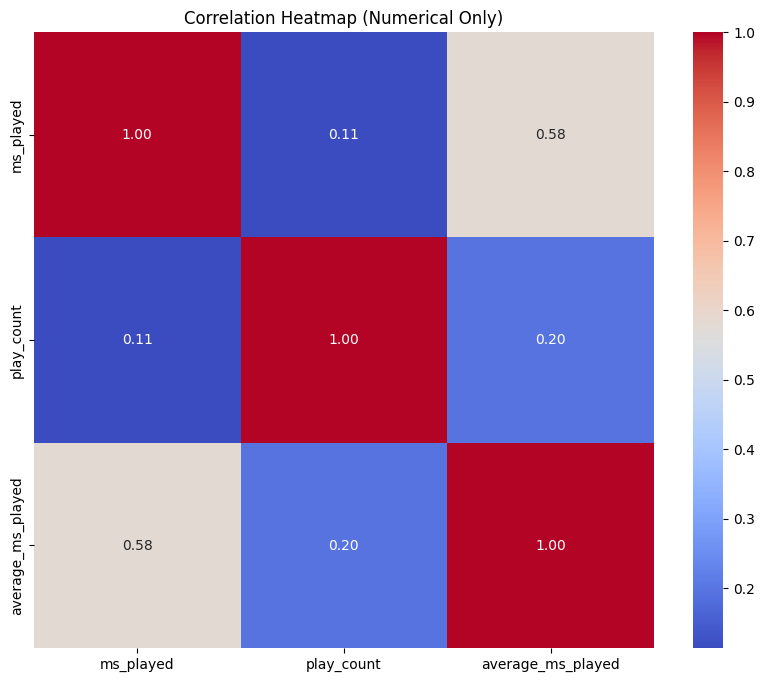

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Only)')
plt.show()

### Distribution of Play Count

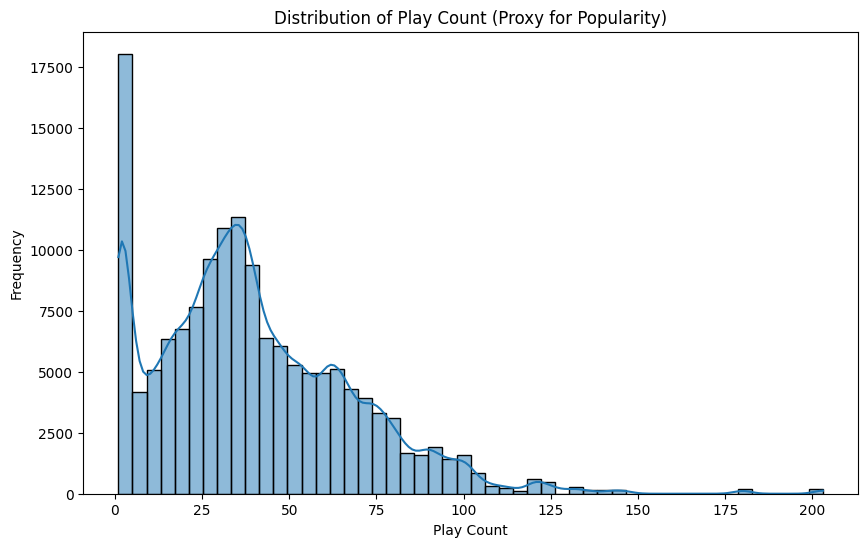

In [ ]:
# Distribution of Play Count
plt.figure(figsize=(10, 6))
sns.histplot(df['play_count'], bins=50, kde=True)
plt.title('Distribution of Play Count (Proxy for Popularity)')
plt.xlabel('Play Count')
plt.ylabel('Frequency')
plt.show()

### Top Artists by Count(Global Impact)

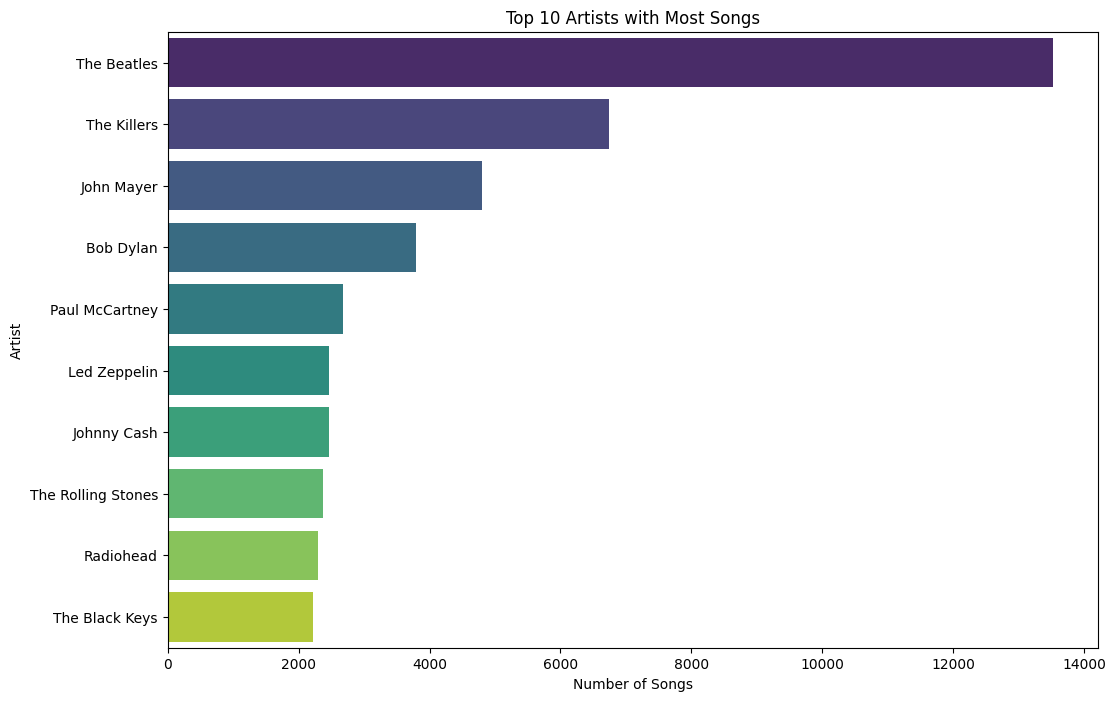

In [ ]:
top_artists = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.barplot(y=top_artists.index, x=top_artists.values, palette='viridis', hue=top_artists.index, legend=False)
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

### "DateTime" format

In [ ]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with invalid timestamps (if any)
df = df.dropna(subset=['timestamp'])

In [ ]:
# Extract time-based features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
df['track_length'] = df['ms_played'] / 1000

In [ ]:
# Convert milliseconds played to minutes
df['duration_minutes'] = df['ms_played'] / (1000 * 60)

In [ ]:
# Drop rows with 0 or negative duration
df = df[df['duration_minutes'] > 0]

In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 145139 entries, 0 to 148674
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  145139 non-null  object        
 1   timestamp          145139 non-null  datetime64[ns]
 2   platform           145139 non-null  object        
 3   ms_played          145139 non-null  int64         
 4   track_name         145139 non-null  object        
 5   artist_name        145139 non-null  object        
 6   album_name         145139 non-null  object        
 7   reason_start       145005 non-null  object        
 8   reason_end         145029 non-null  object        
 9   shuffle            145139 non-null  bool          
 10  skipped            145139 non-null  bool          
 11  play_count         145139 non-null  int64         
 12  average_ms_played  145139 non-null  float64       
 13  year               145139 non-null  int32        

,spotify_track_uri,timestamp,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,...,play_count,average_ms_played,year,month,day,hour,weekday,is_weekend,track_length,duration_minutes
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,...,1,3185.0,2013,7,8,2,0,0,3.185,0.053083
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,...,2,151096.0,2013,7,8,2,0,0,61.865,1.031083
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,...,5,144144.2,2013,7,8,2,0,0,285.386,4.756433
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,...,1,134022.0,2013,7,8,2,0,0,134.022,2.233700
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,...,2,136454.0,2013,7,8,3,0,0,63.485,1.058083


### Most Played songs(overall)

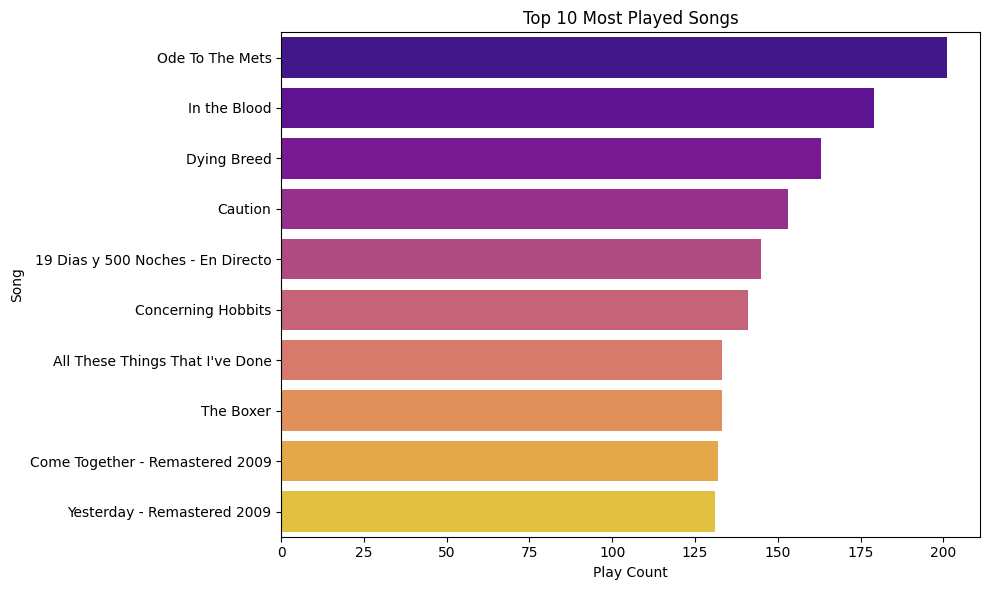

In [ ]:
top_songs = df['track_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_songs.values, y=top_songs.index, palette='plasma', hue=top_songs.index, legend=False)
plt.title('Top 10 Most Played Songs')
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.tight_layout()
plt.show()

### Monthtly Streaming Trends

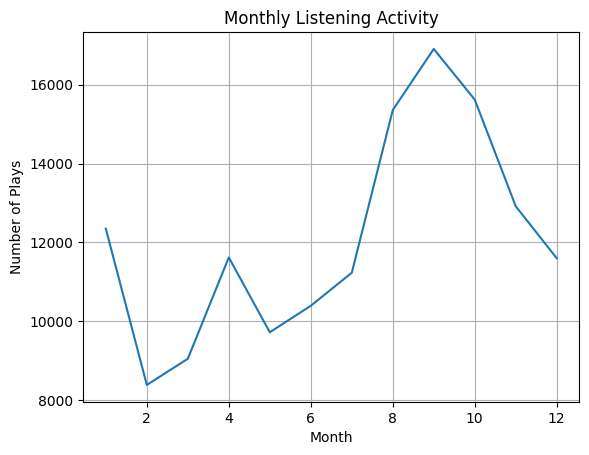

In [ ]:
monthly_counts = df['month'].value_counts().sort_index()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Monthly Listening Activity")
plt.xlabel("Month")
plt.ylabel("Number of Plays")
plt.grid(True)
plt.show()


### Listening by Hour

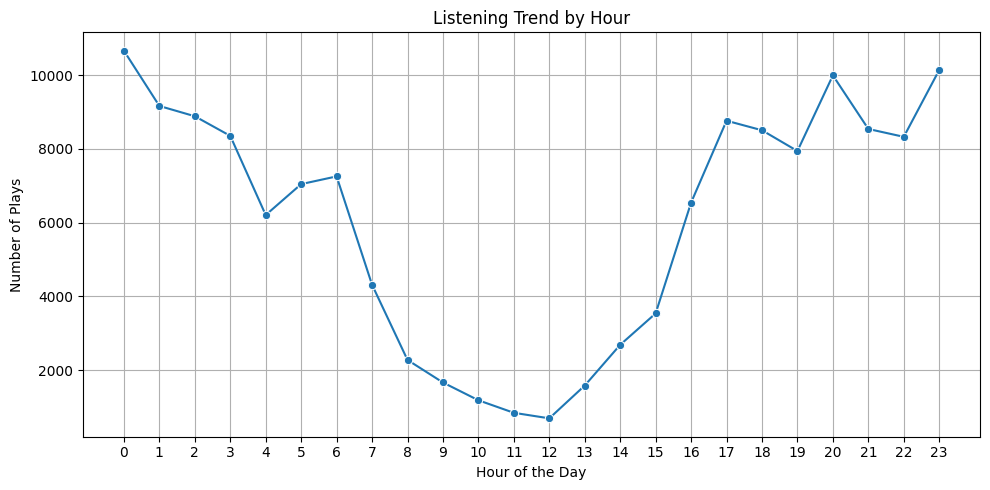

In [ ]:
hourly_trend = df.groupby('hour').size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker='o')
plt.title('Listening Trend by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Plays')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

### Listening Trend by Weekday

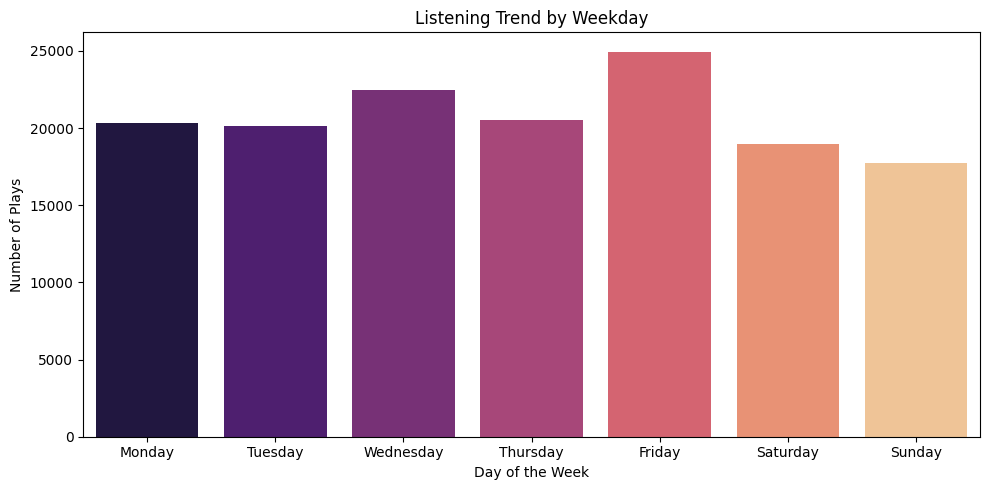

In [ ]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_trend = df['weekday'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=[weekday_order[i] for i in weekday_trend.index], y=weekday_trend.values, palette='magma', hue=[weekday_order[i] for i in weekday_trend.index], legend=False)
plt.title('Listening Trend by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Plays')
plt.tight_layout()
plt.show()

### Feature Selection & Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb

In [ ]:
# Stronger feature set
features = ['hour', 'day', 'weekday', 'month', 'is_weekend', 'platform', 'reason_start', 'reason_end', 'shuffle', 'skipped']
X = df[features].copy() # Use .copy() to avoid SettingWithCopyWarning

# Handle missing values in 'reason_start' and 'reason_end'
X['reason_start'] = X['reason_start'].fillna('unknown')
X['reason_end'] = X['reason_end'].fillna('unknown')

# Convert categorical features to dummy variables
X = pd.get_dummies(X, columns=['platform', 'reason_start', 'reason_end'], drop_first=True)

y = df['ms_played']

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Train XGBoost Regressor

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

 Predict & Evaluate

In [ ]:
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 4649405952.00
R-squared Score: 0.6658


Visualization — Actual vs Predicted

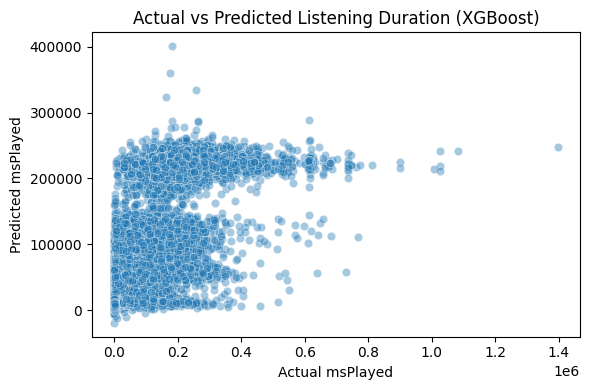

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Actual msPlayed")
plt.ylabel("Predicted msPlayed")
plt.title("Actual vs Predicted Listening Duration (XGBoost)")
plt.tight_layout()
plt.show()


 Plot Feature Importance (XGBoost built-in)

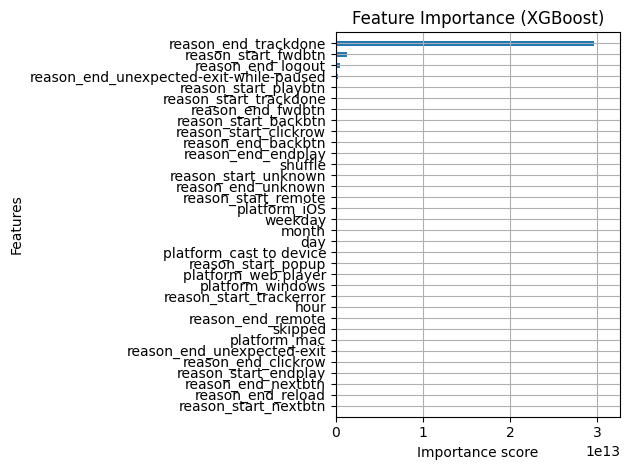

In [ ]:
xgb.plot_importance(xgb_model, importance_type='gain', show_values=False, height=0.5)
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()


SHAP Values for Model Explainability

In [ ]:
import shap

# Create SHAP explainer using TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values for a sample of the test set
sample_size = 1000  # Adjust sample size as needed
X_test_sample = X_test.sample(n=sample_size, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

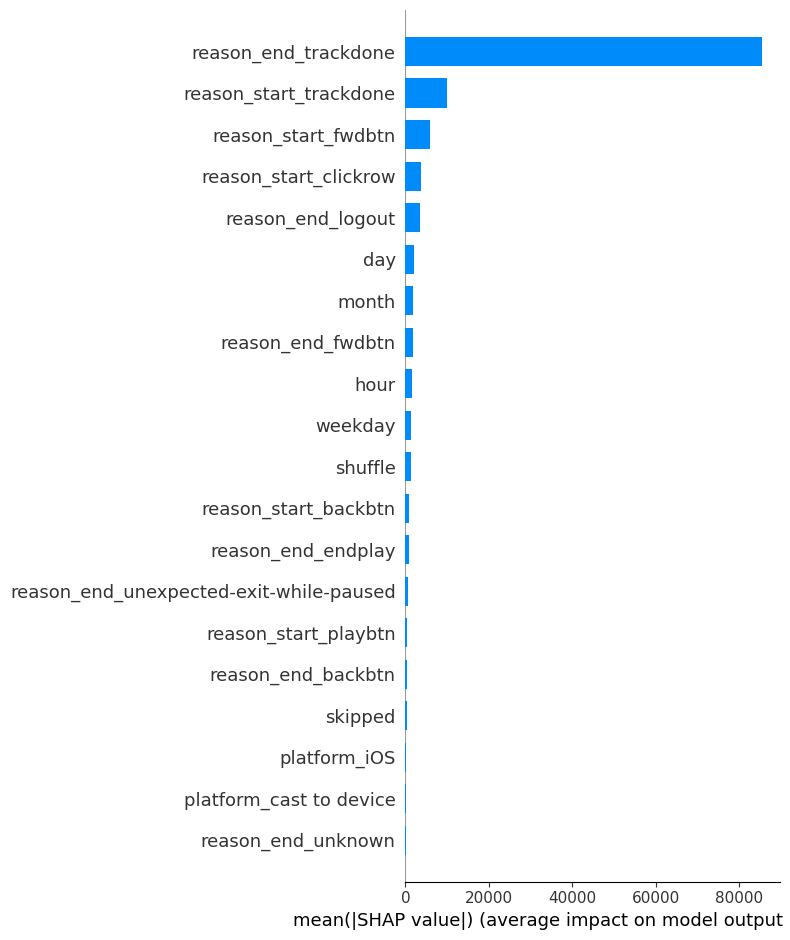

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

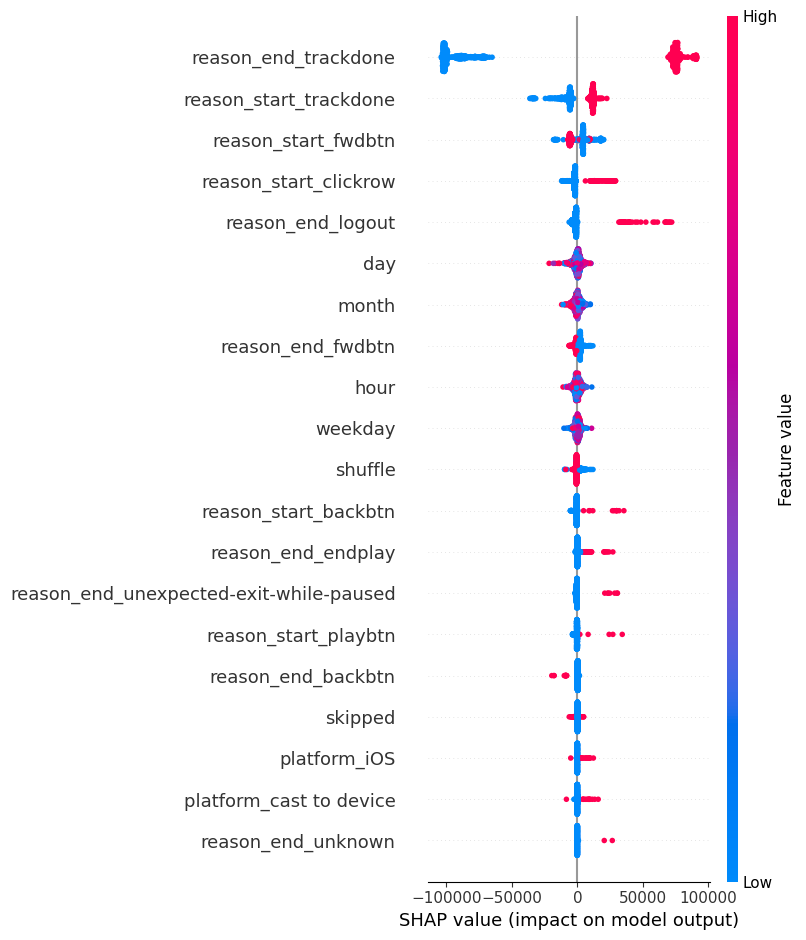

In [ ]:
# SHAP Detailed Beeswarm Plot
import shap
shap.summary_plot(shap_values, X_test_sample)